In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2

In [3]:
img=cv2.imread('C:\Reuben\'s Code\'s\\ML-Notebooks\\research\images_01.tar\images_01\images\\00000001_000.png')


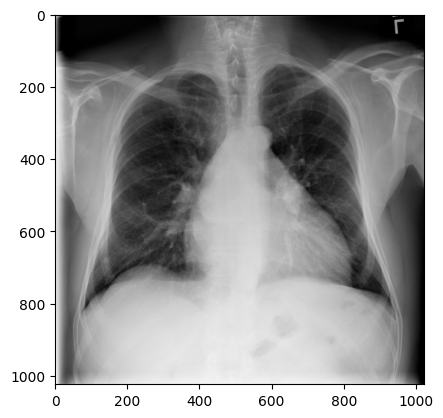

In [4]:
plt.imshow(img,cmap='gray')

In [5]:
img

array([[[202, 202, 202],
        [199, 199, 199],
        [195, 195, 195],
        ...,
        [  5,   5,   5],
        [  2,   2,   2],
        [  0,   0,   0]],

       [[199, 199, 199],
        [196, 196, 196],
        [195, 195, 195],
        ...,
        [  5,   5,   5],
        [  2,   2,   2],
        [  0,   0,   0]],

       [[196, 196, 196],
        [194, 194, 194],
        [193, 193, 193],
        ...,
        [  5,   5,   5],
        [  2,   2,   2],
        [  0,   0,   0]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [254, 254, 254],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0]]

In [7]:
img.shape

(1024, 1024, 3)

In [2]:
data=pd.read_csv('dataset\\train.csv')
#label,pixel0,pixel1,pixel2,...(28X28=784)
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
#Forward propagation

#A[0]=X(784xm)
#Z[1]  =  w[1]    A[0]  +   b[1]
#(10xm)   10x784  784xm     10x1 => 10xm
#A[1]  =  g(Z[1])  =  ReLU(Z[1])
#Z[2]  =  w[2]    A[1]  +   b[2]
#(10xm)   10x10  10xm     10x1 => 10xm
#A[2]  =  g(Z[2])  =  ReLU(Z[2])

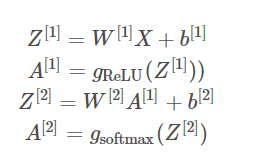

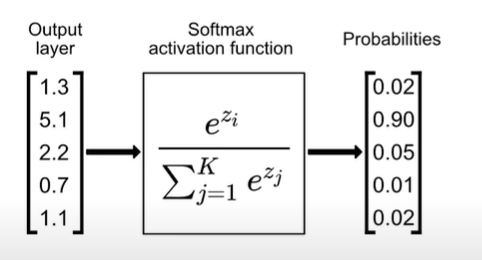

42000 785


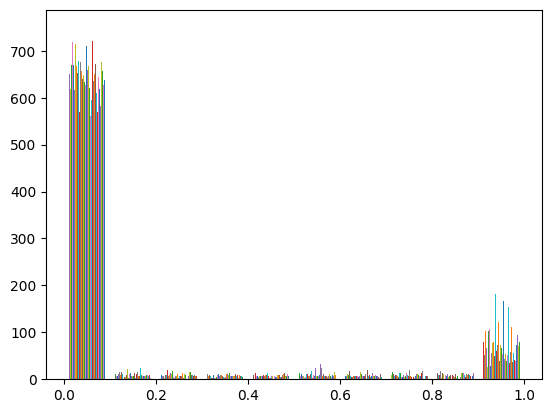

In [5]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets
print(m,n)
data_dev = data[0:1000].T #take first 1000 training examples and transpose it (validation data)
Y_dev = data_dev[0] # label of each image
X_dev = data_dev[1:n] # image for each label
X_dev = X_dev / 255. 

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
plt.hist(X_train)
_,m_train = X_train.shape

In [13]:
Y_train

array([6, 2, 0, ..., 6, 7, 7], dtype=int64)

In [8]:
#A[0]=X(784xm)
#Z[1]  =  w[1]    A[0]  +   b[1]
#(10xm)   10x784  784xm     10x1 => 10xm
#A[1]  =  g(Z[1])  =  ReLU(Z[1])
#Z[2]  =  w[2]    A[1]  +   b[2]
#(10xm)   10x10  10xm     10x1 => 10xm
#A[2]  =  g(Z[2])  =  ReLU(Z[2])
def init_params():
    W1 = np.random.rand(10, 784) - 0.5
    b1 = np.random.rand(10, 1) - 0.5
    W2 = np.random.rand(10, 10) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    W3 = np.random.rand(10, 10) - 0.5
    b3 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2, W3, b3

def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A
    
def forward_prop(W1, b1, W2, b2, W3, b3, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = ReLU(Z2)
    Z3 = W3.dot(A2) + b3
    A3 = softmax(Z3)
    return Z1, A1, Z2, A2 ,Z3,A3

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y


BackPropagation

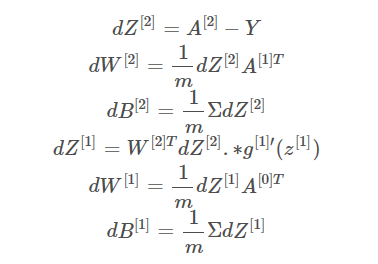

Parameter Update

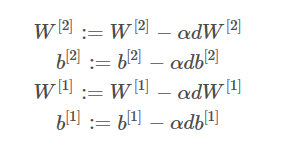

In [9]:
def backward_prop(Z1, A1,Z2,A2,Z3,A3, W1, W2,W3, X, Y):
    one_hot_Y = one_hot(Y)
    dZ3 = A3 - one_hot_Y
    dW3 = 1 / m * dZ3.dot(A2.T)
    db3 = 1 / m * np.sum(dZ3)
    dZ2 = W3.T.dot(dZ3) * ReLU_deriv(Z2)
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2,dW3,db3

def update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2,dW3, db3, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2
    W3 = W3 - alpha * dW3  
    b3 = b3 - alpha * db3    
    return W1, b1, W2, b2 ,W3 , b3

In [36]:
def get_predictions(A3):
    return np.argmax(A3, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 ,W3 , b3= init_params()
    iterations_list = []
    predictions_list = []
    for i in range(iterations):
        Z1, A1, Z2, A2 ,Z3,A3= forward_prop(W1, b1, W2, b2, W3, b2, X)
        dW1, db1, dW2, db2, dW3, db3 = backward_prop(Z1, A1, Z2, A2, Z3,A3, W1, W2, W3, X, Y)
        W1, b1, W2, b2, W3, b3 = update_params(W1, b1, W2, b2, W3, b3, dW1, db1, dW2, db2,dW3, db3, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A3)
            accuracy= get_accuracy(predictions, Y)
            print(accuracy)
            # Save iteration and prediction in the lists
            iterations_list.append(i)
            predictions_list.append(1-accuracy)
    return W1, b1, W2, b2 , W3, b3 ,iterations_list, predictions_list

In [37]:
W1, b1, W2, b2 , W3, b3 , iteration, prediction = gradient_descent(X_train, Y_train, 0.20, 500)

Iteration:  0
[3 6 6 ... 0 0 6] [3 8 3 ... 7 3 6]
0.09439024390243902
Iteration:  10
[3 6 6 ... 7 6 6] [3 8 3 ... 7 3 6]
0.18165853658536585
Iteration:  20
[3 6 6 ... 7 6 6] [3 8 3 ... 7 3 6]
0.2733658536585366
Iteration:  30
[3 6 6 ... 7 3 0] [3 8 3 ... 7 3 6]
0.32546341463414635
Iteration:  40
[3 6 6 ... 7 3 3] [3 8 3 ... 7 3 6]
0.374390243902439
Iteration:  50
[3 6 6 ... 7 3 3] [3 8 3 ... 7 3 6]
0.43114634146341463
Iteration:  60
[3 3 6 ... 7 3 3] [3 8 3 ... 7 3 6]
0.5191219512195122
Iteration:  70
[3 3 6 ... 7 3 3] [3 8 3 ... 7 3 6]
0.5521951219512196
Iteration:  80
[3 3 2 ... 7 3 3] [3 8 3 ... 7 3 6]
0.565170731707317
Iteration:  90
[3 3 2 ... 7 3 2] [3 8 3 ... 7 3 6]
0.5676097560975609
Iteration:  100
[3 3 6 ... 7 3 2] [3 8 3 ... 7 3 6]
0.5909024390243902
Iteration:  110
[3 5 0 ... 7 3 2] [3 8 3 ... 7 3 6]
0.5629024390243902
Iteration:  120
[3 8 0 ... 7 3 2] [3 8 3 ... 7 3 6]
0.6400487804878049
Iteration:  130
[3 8 0 ... 7 3 2] [3 8 3 ... 7 3 6]
0.6400487804878049
Iteration:  140

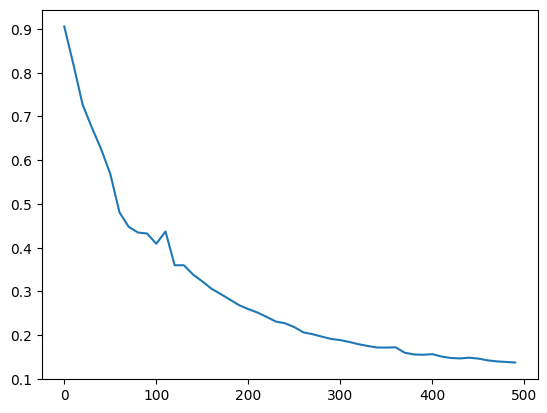

In [38]:
plt.plot(iteration,prediction)

In [12]:
# W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)
Y_train

array([3, 8, 3, ..., 7, 3, 6], dtype=int64)

In [28]:
def make_predictions(X, W1, b1, W2, b2, W3, b3):
    _, _, _, _ ,_,A3 = forward_prop(W1, b1, W2, b2, W3, b3, X)
    predictions = get_predictions(A3)
    return predictions

def test_prediction(index, W1, b1, W2, b2, W3, b3):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2, W3, b3)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  3


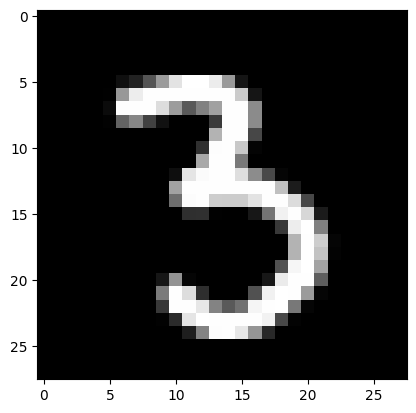

Prediction:  [8]
Label:  8


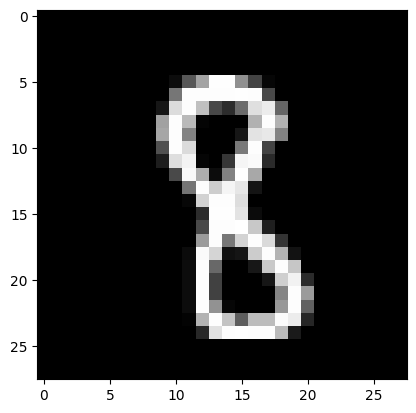

Prediction:  [3]
Label:  3


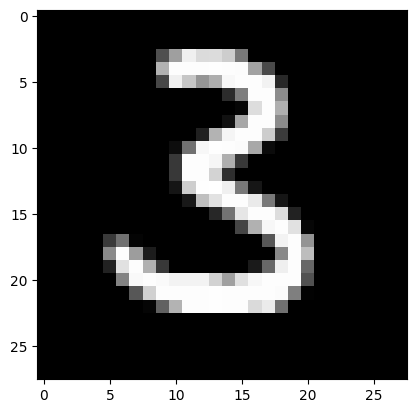

Prediction:  [2]
Label:  2


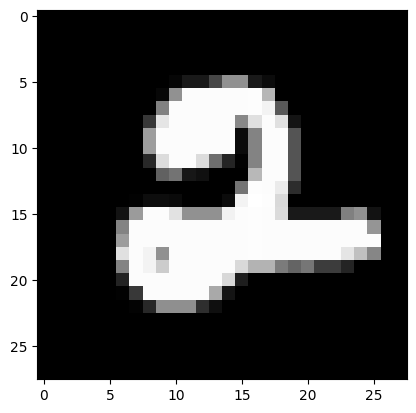

In [29]:
test_prediction(0, W1, b1, W2, b2, W3, b3)
test_prediction(1, W1, b1, W2, b2, W3, b3)
test_prediction(2, W1, b1, W2, b2, W3, b3)
test_prediction(3, W1, b1, W2, b2, W3, b3)